# Chapter 3: Building Models with Keras

In [22]:
%matplotlib inline
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Data Wrangle the Boston House Price Dataset

In [35]:
# For info on the dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv(dataset_url, delim_whitespace=True, names=colnames)

# Get a gist of your data
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
# Note that there is one catagorical variable (CHAS)
# Apply one hot encoding (also called dummy variables)
dataframe = pd.get_dummies(dataframe, columns=["CHAS"])

# Print the new columns
dataframe.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [37]:
# Set the target values as the median value of houses
# Set all other variables as the explanatory variables
# Use the zscore to standardize the numerical variables
targets = zscore(dataframe.MEDV)
predictors = zscore(dataframe.drop("MEDV", axis=1).as_matrix())

## Build Your First (Regression) Model with Keras!

#### Set up the Architecture

In [71]:
# Set the number of columns: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add a hidden layer
model.add(Dense(n_cols, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(1, input_shape=(n_cols,)))

#### Compile the model

In [72]:
# Use the adam optimizer and mean_squared_error loss function
model.compile(optimizer="sgd", loss='mse', metrics=["mse"])

[array([[ 0.10748732, -0.4103258 , -0.35353136, -0.10338315, -0.04227152,
        -0.33812466,  0.45260876, -0.24231431,  0.14492548,  0.36173201,
        -0.13239878,  0.05448776, -0.31418663,  0.09701127],
       [ 0.12785769, -0.08761874, -0.25698841,  0.40717524,  0.37662578,
         0.15171808, -0.09776264, -0.18161049,  0.37909871,  0.43354422,
        -0.37534064, -0.08759943, -0.26521036, -0.11437762],
       [-0.00647917,  0.23992038, -0.12339887,  0.09868753,  0.01935086,
         0.21383977,  0.38301903,  0.24889404,  0.16130936, -0.2878263 ,
         0.11055815, -0.3178336 ,  0.29219192,  0.25833684],
       [ 0.14428616, -0.00476727, -0.35977668,  0.03134218, -0.43260026,
        -0.19108379, -0.30222392, -0.04084095, -0.16844124,  0.45837379,
         0.03463176,  0.35747355,  0.14013755, -0.44316927],
       [ 0.03651151, -0.42515051, -0.25276423,  0.40929317,  0.16412538,
        -0.05869791,  0.14166659,  0.13677561,  0.35512882, -0.02195773,
         0.28623998,  0.3

In [73]:
# Fit the model
history = model.fit(predictors, targets, epochs=10)

Epoch 1/10
506/506 [==============================] - 0s - loss: 1.5789 - mean_squared_error: 1.5789     
Epoch 2/10
506/506 [==============================] - 0s - loss: 0.6596 - mean_squared_error: 0.6596     
Epoch 3/10
506/506 [==============================] - 0s - loss: 0.4431 - mean_squared_error: 0.4431     
Epoch 4/10
506/506 [==============================] - 0s - loss: 0.3568 - mean_squared_error: 0.3568     
Epoch 5/10
506/506 [==============================] - 0s - loss: 0.3106 - mean_squared_error: 0.3106     
Epoch 6/10
506/506 [==============================] - 0s - loss: 0.2798 - mean_squared_error: 0.2798     
Epoch 7/10
506/506 [==============================] - 0s - loss: 0.2584 - mean_squared_error: 0.2584     
Epoch 8/10
506/506 [==============================] - 0s - loss: 0.2435 - mean_squared_error: 0.2435     
Epoch 9/10
506/506 [==============================] - 0s - loss: 0.2329 - mean_squared_error: 0.2329     
Epoch 10/10
506/506 [=========================

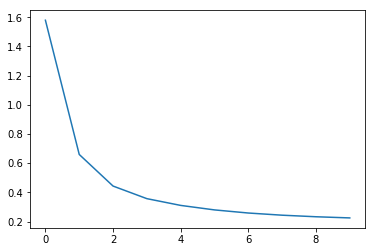

In [74]:
plt.plot(history.history['mean_squared_error'])

## Build Your First (Classification) Model with Keras!

In [81]:
# Do all the data wrangling on the backend
%run data_wrangling_titantic.ipynb

Targets
 [[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]
Targets and predictors from titantic data set loaded successfully.


In [82]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add a hidden layer
model.add(Dense(n_cols, activation='sigmoid', input_shape=(n_cols,)))

# Add another hidden layer
model.add(Dense(n_cols, activation='sigmoid'))

# Add the output layer
# Notice a softmax activation on the output
model.add(Dense(2, activation='softmax'))

In [83]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: categorical_crossentropy


In [84]:
# Fit the model
model.fit(predictors, targets)

Epoch 1/10
891/891 [==============================] - 0s - loss: 0.7535 - acc: 0.3760     
Epoch 2/10
891/891 [==============================] - 0s - loss: 0.6919 - acc: 0.5354     
Epoch 3/10
891/891 [==============================] - 0s - loss: 0.6692 - acc: 0.6162     
Epoch 4/10
891/891 [==============================] - 0s - loss: 0.6597 - acc: 0.6162     
Epoch 5/10
891/891 [==============================] - 0s - loss: 0.6533 - acc: 0.6162     
Epoch 6/10
891/891 [==============================] - ETA: 0s - loss: 0.6550 - acc: 0.606 - 0s - loss: 0.6474 - acc: 0.6162     
Epoch 7/10
891/891 [==============================] - 0s - loss: 0.6421 - acc: 0.6162     
Epoch 8/10
891/891 [==============================] - 0s - loss: 0.6359 - acc: 0.6218     
Epoch 9/10
891/891 [==============================] - 0s - loss: 0.6300 - acc: 0.6364     
Epoch 10/10
891/891 [==============================] - 0s - loss: 0.6239 - acc: 0.6352     


In [85]:
# Predict with the Model

# Make a fake person (out-of-data sample) to predict the odds of survival
new_data = {'Age' : [10], 'SibSp' : [2], 'Parch' : [2], 'Fare' : [500],
            'Sex_female' : [1], 'Sex_male' : [0],
            'Pclass_1' : [0], 'Pclass_2' : [1], 'Pclass_3' : [0],
            'Embarked_C' : [0], 'Embarked_Q' : [0], 'Embarked_S' : [1]}
df = pd.DataFrame(data=new_data)
pred_data = df.as_matrix()

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

[ 0.66794533]
